In [1]:
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt
import numpy as np
import PyQt5
import sys

sys.path.append('..') #go back 1 folder
from library import to_inhomogeneous, cross0p, essential_matrix, fundamental_matrix, epipolar_line, triangulate, project_points

## SETING UP THE CAMERAS

In [2]:
f = 1000
dx = 300
dy = 200
K1 = K2 = np.array([[f, 0, dx], [0, f, dy], [0, 0, 1]])
R1 = np.identity(3)
R2 = Rotation.from_euler('xyz', [0.7, -0.5, 0.8]).as_matrix()
t1 = np.array([[0,0,0]]).T
t2 = np.array([[0.2,2,1]]).T


## Exercise 3.1
* we have point $Q = [1,0.5,4,1]^T$
* find projection in Cam1 and Cam2

In [3]:
Q = np.array([[1,0.5,4,1]]).T
q1 = project_points(K1, R1, t1, Q)
q2 = project_points(K2, R2, t2, Q)
print("q1", to_inhomogeneous(q1))
print("q2", to_inhomogeneous(q2))

q1 [[550.]
 [325.]]
q2 [[582.47256835]
 [185.98985776]]


## Exercise 3.2
* Implement Cross0p function doing a crossproduct

In [4]:
p = np.array([[3, 4, 5]]).T
print(cross0p(p))

[[ 0 -5  4]
 [ 5  0 -3]
 [-4  3  0]]


## Exercises 3.3
* compute the fundamental matrix of the two cameras

In [5]:
E = essential_matrix(t2,R2) # USE THE SECOND CAMERA!
print(E)
F = fundamental_matrix(K1,K2,E)
print(F)

[[ 0.32931188  0.81939633  2.05429875]
 [ 0.51553255 -0.87691598  0.07241923]
 [-1.09692748  1.5899527  -0.55569822]]
[[ 3.29311881e-07  8.19396327e-07  1.79162592e-03]
 [ 5.15532551e-07 -8.76915984e-07  9.31426656e-05]
 [-1.29882755e-03  1.51951700e-03 -1.10072682e+00]]


## Exercise 3.4
* epipolar line L of q1 in camera two
* $L_2 = F@q_1$
* $q2^T@F@q_1 = 0 as q2 is on epipolar line itself

In [6]:
l2 = epipolar_line(F, q1)
print(l2)

[[ 8.95620504e-03]
 [ 3.66751496e-04]
 [-5.28495581e+00]]


## Exercise 3.5
IS $q_2$ on the line?
* q2 must be on the line, as F is defined as q2.T @F@ q1 = 0
* This must be true, since both the point q2 and the line l are derived from the same 3D point Q.
This 3D point yields a single epipolar plane, and the plane yields a single line in each camera. The
projections of the 3D point must lie on the epipolar lines.

In [7]:
print((q2.T@l2)[0][0])
print('YES! Its nearly zero')

8.000105582412339e-15


## Exercise 3.6
* Now assume that both camera one and two have local coordinate systems that are different from
the coordinate system of the world
* Let $Q$ and $Q^-$ denote the same 3D point in world space and in the frame of camera one. In other
words we have relation

$Q^- = \begin{bmatrix}
R_1 & t_1 \\
0 & 1 
\end{bmatrix} Q$

$ Q = \begin{bmatrix}
R_1^T & -R_1^T t_1 \\
0 & 1 
\end{bmatrix} Q^-$ 

* the inversion of the matrix can be done using the [Rt]=eye(4) and switching the sides of the equation
* on the right side we will receive the inversion, which would be equal to the matrix above

$$
\begin{aligned}
\tilde{\boldsymbol{Q}} &=\left[\begin{array}{cc}
\boldsymbol{R}_{1} & \boldsymbol{t}_{1} \\
\mathbf{0} & 1
\end{array}\right]\left[\begin{array}{cc}
\boldsymbol{R}_{1}^{\mathrm{T}} & -\boldsymbol{R}_{1}^{\mathrm{T}} \boldsymbol{t}_{1} \\
\mathbf{0} & 1
\end{array}\right] \tilde{\boldsymbol{Q}}, \\
\tilde{\boldsymbol{Q}} &=\left[\begin{array}{cc}
\boldsymbol{R}_{1} \boldsymbol{R}_{1}^{\mathrm{T}} & -\boldsymbol{R}_{1} \boldsymbol{R}_{1}^{\mathrm{T}} \boldsymbol{t}_{1}+\boldsymbol{t}_{1} \\
\mathbf{0} & 1
\end{array}\right] \tilde{\boldsymbol{Q}} \\
\tilde{\boldsymbol{Q}} &=\left[\begin{array}{ll}
\boldsymbol{I} & \mathbf{0} \\
\mathbf{0} & 1
\end{array}\right] \tilde{\boldsymbol{Q}} .
\end{aligned}
$$

## 3.7 Projection
Show that we can work only in the coordinate system of camera one, by showing that we can
project points with

$q_1 = K \begin{bmatrix} I & 0 \end{bmatrix} Q_{tilde}$ and $q_2 = K \begin{bmatrix} R_2^{tilde} & t_2^{tilde} \end{bmatrix} Q_{tilde}$

where $R_2^{tilde} = R_2 R_1^T$ 

and $t_2^{tilde} = t_2 - R_2 R_1^T t_1$

The first equation is easily received from perspective projection

$$
\begin{array}{cc}
u_{l}=f_{x}^{(l)} \frac{x_{l}}{z_{l}}+o_{x}^{(l)} & v_{l}=f_{y}^{(l)} \frac{y_{l}}{z_{l}}+o_{y}^{(l)} \\
z_{l} u_{l}=f_{x}^{(l)} x_{l}+z_{l} o_{x}^{(l)} & z_{l} v_{l}=f_{y}^{(l)} y_{l}+z_{l} o_{y}^{(l)}
\end{array}
$$
Representing in matrix form:
$$
z_{l}\left[\begin{array}{c}
u_{l} \\
v_{l} \\
1
\end{array}\right]=\left[\begin{array}{c}
z_{l} u_{l} \\
z_{l} v_{l} \\
z_{l}
\end{array}\right]=\left[\begin{array}{c}
f_{x}^{(l)} x_{l}+z_{l} o_{x}^{(l)} \\
f_{y}^{(l)} y_{l}+z_{l} o_{y}^{(l)} \\
z_{l}
\end{array}\right]=\left[\begin{array}{ccc}
f_{x}^{(l)} & 0 & o_{x}^{(l)} \\
0 & f_{y}^{(l)} & o_{y}^{(l)} \\
0 & 0 & 1
\end{array}\right]\left[\begin{array}{c}
x_{l} \\
y_{l} \\
z_{l}
\end{array}\right]
$$

For the first projection in camera one we reduce the projection equation:
$$
\begin{aligned}
\boldsymbol{q}_{1} &=\boldsymbol{K}\left[\boldsymbol{R}_{1} \mid \boldsymbol{t}_{1}\right] \boldsymbol{Q} \\
&=\boldsymbol{K}[\boldsymbol{I} \quad 0]\left[\begin{array}{cc}
\boldsymbol{R}_{1} & \boldsymbol{t}_{1} \\
\mathbf{0} & 1
\end{array}\right] \boldsymbol{Q} \\
&=\boldsymbol{K}[\boldsymbol{I} \quad 0] \tilde{\boldsymbol{Q}}
\end{aligned}
$$


For the second projection into camera two we insert Eq. (14)
$$
\begin{aligned}
\boldsymbol{q}_{2} &=\boldsymbol{K}\left[\boldsymbol{R}_{2} \mid \boldsymbol{t}_{2}\right] \boldsymbol{Q} \\
\boldsymbol{q}_{2} &=\boldsymbol{K}\left[\boldsymbol{R}_{2} \mid \boldsymbol{t}_{2}\right]\left[\begin{array}{cc}
\boldsymbol{R}_{1}^{\mathrm{T}} & -\boldsymbol{R}_{1}^{\mathrm{T}} \boldsymbol{t}_{1} \\
\mathbf{0} & 1
\end{array}\right] \tilde{\boldsymbol{Q}} \\
\boldsymbol{q}_{2} &=\boldsymbol{K}\left[\boldsymbol{R}_{2} \boldsymbol{R}_{1}^{\mathrm{T}} \quad \boldsymbol{t}_{2}-\tilde{\boldsymbol{R}}_{2} \boldsymbol{t}_{1}\right] \tilde{\boldsymbol{Q}} \\
\boldsymbol{q}_{2} &=\boldsymbol{K}\left[\begin{array}{rr}
\tilde{\boldsymbol{R}}_{2} & \tilde{t}_{2}
\end{array}\right] \tilde{\boldsymbol{Q}} .
\end{aligned}
$$


The second equation $q_2$ is received by applying the translation and rotation of the second camera with regards to the first one. In our example the rotation matrix $R_1$ is equal to $I$ and $t_1$ is equal to zero (that's also the reason why there is $I$ and $0$ in $q_1$ (I hope)

## 3.8 Fundamental Matrix
* Load the file TwoImageData.npy, and compute the fundamental matrix between camera one and two
* Notice that now that R1 == I, and t1 == 0!
* We therefor do not actually need to do the tricks we learned in the previous exercise! :0

* the essential matrix E is received from epipolar constraints as

$E = K_1^T\cdot F\cdot K_2$

$E = T_X\cdot R$

$F = inv(K_2)\cdot E\cdot inv(K_1^T)$

[[-0.04594547]
 [-0.00017171]
 [ 0.00157051]] [[ 9.97063888e-01  1.21564307e-04  7.65740684e-02]
 [-1.37753401e-04  9.99999969e-01  2.06135565e-04]
 [-7.65740409e-02 -2.16078666e-04  9.97063874e-01]]


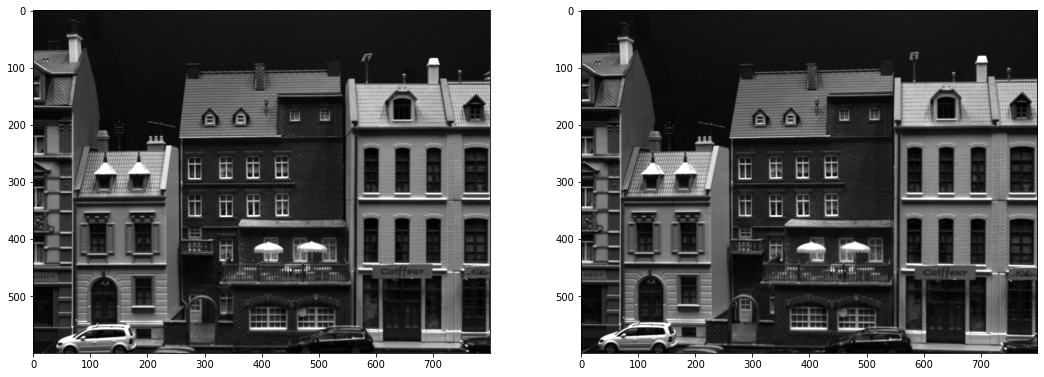

In [8]:
two_image_data = np.load('TwoImageData.npy', allow_pickle=True).item()

gray_left = two_image_data["im1"]
gray_right = two_image_data["im2"]

R1 = two_image_data["R1"]
R2 = two_image_data["R2"]

t1 = two_image_data["t1"]
t2 = two_image_data["t2"]

K1 = two_image_data["K"]
K2 = K1.copy()

f, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(18,18))
ax_left.imshow(gray_left, cmap="gray")
ax_right.imshow(gray_right, cmap="gray")

print(t2,R2)
E = essential_matrix(t2,R2) # USE THE SECOND CAMERA!
F = fundamental_matrix(K1,K2,E)

### 3.9 Epipolar lines display

[[17 17 14 ... 19 18 20]
 [15 16 15 ... 18 17 19]
 [14 14 15 ... 18 18 21]
 ...
 [13 14 16 ...  4  4  5]
 [13 13 14 ...  4  5  6]
 [12 13 14 ...  6  6  5]] [[14 15 12 ... 22 20 21]
 [13 14 14 ... 21 19 20]
 [13 12 13 ... 19 20 22]
 ...
 [14 19 38 ...  5  5  6]
 [27 56 90 ...  5  6  7]
 [49 76 74 ...  5  7  6]] [[ 6.67972386e-12 -7.85049967e-10  1.17921973e-07]
 [-9.75936980e-10 -4.86806510e-12  3.28699196e-05]
 [ 4.23506610e-07 -3.21704080e-05 -2.12002228e-04]]


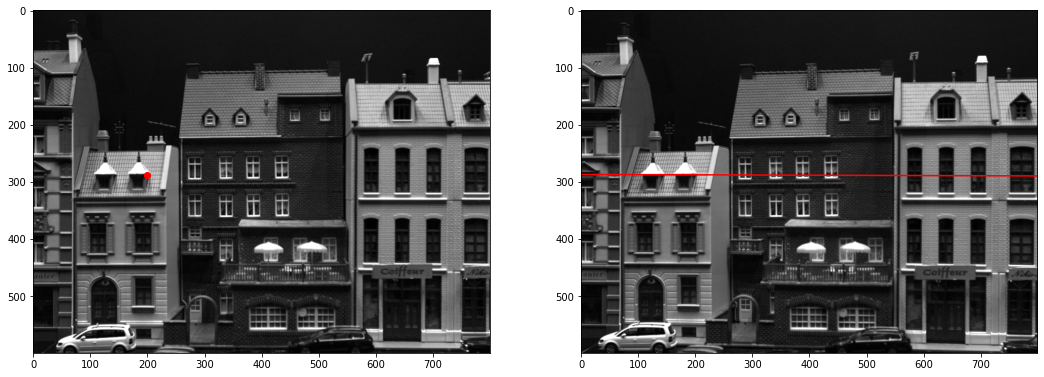

In [9]:
def DrawLine(l, shape, ax):
    #Checks where the line intersects the four sides of the image
    # and finds the two intersections that are within the frame
    def in_frame(l_im):
        q = np.cross(l.flatten(), l_im)
        q = q[:2]/q[2]
        if all(q>=0) and all(q+1<=shape[1::-1]):
            return q
    lines = [[1, 0, 0], [0, 1, 0], [1, 0, 1-shape[1]], [0, 1, 1-shape[0]]]
    P = [in_frame(l_im) for l_im in lines if in_frame(l_im) is not None]
    ax.plot(*np.array(P).T, c="r")


def click_epiline(img1, img2, F):
    # We need to turn off the matplotlib inline to use ginput.
    %matplotlib qt
    # Extract one inhomogenous point p in left image.
    plt.imshow(img1)
    x = plt.ginput(1) # one input
    plt.show()

    # Translate point to homogenous coordinates
    p1 = np.array(x).reshape(2, 1)
    q1 = np.vstack((p1, np.ones(1)))

    # Use F-matrix to get the epipolar line of other camera.
    l2 = epipolar_line(F, q1)

    # Return to inline plotting
    %matplotlib inline
    f, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(18,18))
    # left
    ax_left.imshow(img1, cmap="gray")
    ax_left.plot(p1[0], p1[1], 'ro')
    # right
    ax_right.imshow(img2, cmap="gray")
    DrawLine(l2, img2.shape, ax_right)
    # display
    plt.show()

print(gray_left, gray_right, F)
click_epiline(gray_left, gray_right, F)

## 3.10 Oppose the images!
- Go from img2 --> img1 instead
- Luckily, F gives a pretty easy transition between the two! 

$l_2 = F q_1$

$l_1 = F^T q_2$

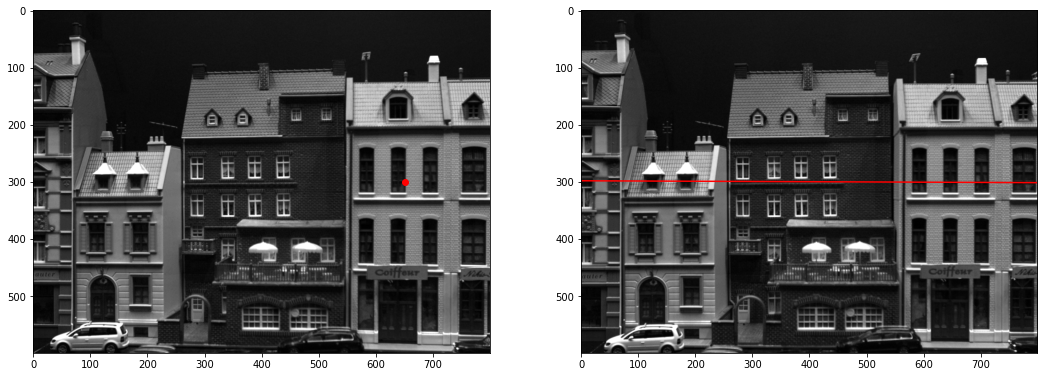

In [10]:
click_epiline(gray_right, gray_left, F.T)

### 3.11 Triangulation

- Using the pixel coordinates q1, q2, ..., qn we want to find the position of the points in 3D.
- use the linear algorithm presented at the end of lecture

In [11]:
Q = np.array([4, 6, 2, 1]).reshape(4, 1) # Reshape to column matrix.

# Make the projection matrixes for both cameras.
P1 = K1 @ np.hstack([R1, t1])
P2 = K2 @ np.hstack([R2, t2])

# Aquire the pixel points in each camera, using function from ex1.
q1 = to_inhomogeneous(project_points(K1, R1, t1, Q))
q2 = to_inhomogeneous(project_points(K2, R2, t2, Q))

print("Actual Q:", Q)
print("-----------")
print("Q projected:", triangulate(np.hstack((q1, q2)), [P1, P2]))

Actual Q: [[4]
 [6]
 [2]
 [1]]
-----------
Q projected: [[4.]
 [6.]
 [2.]]
